# **Amdox AI-Powered Task Optimizer**

Text Emotion Detection

In [1]:
!pip install speechrecognition vaderSentiment textblob matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.4 MB/s eta 0:00:00


In [2]:
import speech_recognition as sr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
analyzer = SentimentIntensityAnalyzer()

def detect_text_emotion(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "happy"
    elif score <= -0.05:
        return "sad"
    else:
        return "neutral"

text_input = input("Enter how you feel: ")
text_emotion = detect_text_emotion(text_input)

print("Text Emotion:", text_emotion)


Enter how you feel: i am so tired
Text Emotion: sad


Speech Emotion Detection

In [4]:
import speech_recognition as sr

def speech_emotion_from_file(audio_path):
    r = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)

    try:
        text = r.recognize_google(audio)
        emotion = text_emotion(text)
        return text, emotion
    except:
        return "Could not recognize", "Neutral"


In [5]:
from google.colab import files
uploaded_audio = files.upload()


Saving voice.m4a.ogg to voice.m4a.ogg


In [6]:
import subprocess

input_audio = list(uploaded_audio.keys())[0]
output_audio = "converted_audio.wav"

subprocess.run([
    "ffmpeg", "-y",
    "-i", input_audio,
    "-ac", "1",
    "-ar", "16000",
    output_audio
], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

print("Converted to PCM WAV:", output_audio)


Converted to PCM WAV: converted_audio.wav


In [7]:
import speech_recognition as sr

r = sr.Recognizer()

with sr.AudioFile("converted_audio.wav") as source:
    audio = r.record(source)

try:
    speech_text = r.recognize_google(audio)
    print("Recognized Speech:", speech_text)

    speech_emotion = detect_text_emotion(speech_text)
    print("Speech Emotion:", speech_emotion)

except Exception as e:
    print("Speech recognition failed:", e)
    speech_emotion = "neutral"


Recognized Speech: hi right now I'm enjoying my work
Speech Emotion: happy


Facial Emotion Detection (Pre-trained)

In [8]:
!pip install deepface


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.8 MB/s eta 0:00:00


In [9]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np


26-01-08 15:46:39 - Directory /root/.deepface has been created
26-01-08 15:46:39 - Directory /root/.deepface/weights has been created


In [10]:
import urllib.request

url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
urllib.request.urlretrieve(url, "face.jpg")

print("Sample image downloaded")


Sample image downloaded


Detected Emotion: neutral


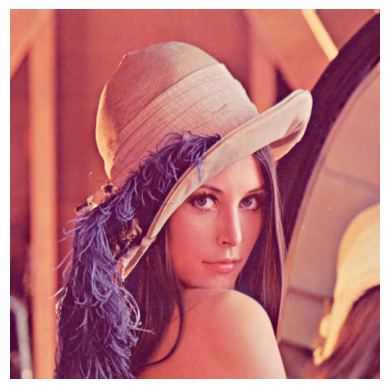

In [ ]:
img = cv2.imread("face.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = DeepFace.analyze( img_rgb,
actions=['emotion'],
enforce_detection=False )
plt.imshow(img_rgb)
plt.axis('off')
face_emotion = result[0]['dominant_emotion']
print("Detected Emotion:", face_emotion)


Overall Emotion Detection Results

In [ ]:
print("Text Emotion:", text_emotion)
print("Speech Emotion:", speech_emotion)
print("Face Emotion:", face_emotion)


Text Emotion: happy
Speech Emotion: happy
Face Emotion: neutral


Stress Analysis

In [ ]:
emotions = [text_emotion, speech_emotion, face_emotion]

stress_emotions = ["sad", "angry", "fear", "disgust"]

stress_count = sum(1 for e in emotions if e in stress_emotions)

if stress_count >= 2:
    stress_level = "HIGH"
else:
    stress_level = "NORMAL"

print("Stress Level:", stress_level)


Stress Level: NORMAL


Task Recommendation

In [ ]:
if stress_level == "HIGH":
    recommendation = "Take a short break, practice deep breathing, and avoid heavy tasks."
else:
    recommendation = "You can proceed with your regular tasks."

print("Recommended Action:", recommendation)


Recommended Action: You can proceed with your regular tasks.


Visual Analytics

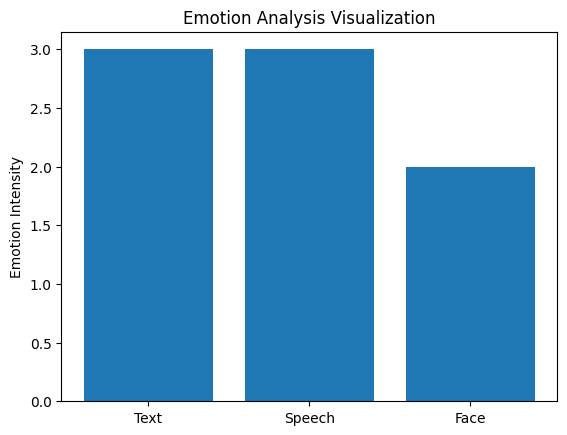

In [ ]:
import matplotlib.pyplot as plt

emotion_labels = ['Text', 'Speech', 'Face']
emotion_values = [text_emotion, speech_emotion, face_emotion]

emotion_map = {
    'happy': 3,
    'neutral': 2,
    'sad': 1,
    'angry': 1,
    'fear': 1,
    'disgust': 1
}

scores = [emotion_map.get(e, 2) for e in emotion_values]

plt.bar(emotion_labels, scores)
plt.title("Emotion Analysis Visualization")
plt.ylabel("Emotion Intensity")
plt.show()
